## **OPENCV OVERALL**

### **1) Load and show**

In [20]:
import cv2
from google.colab.patches import cv2_imshow

Height: 480
Width: 771
Channel: 3


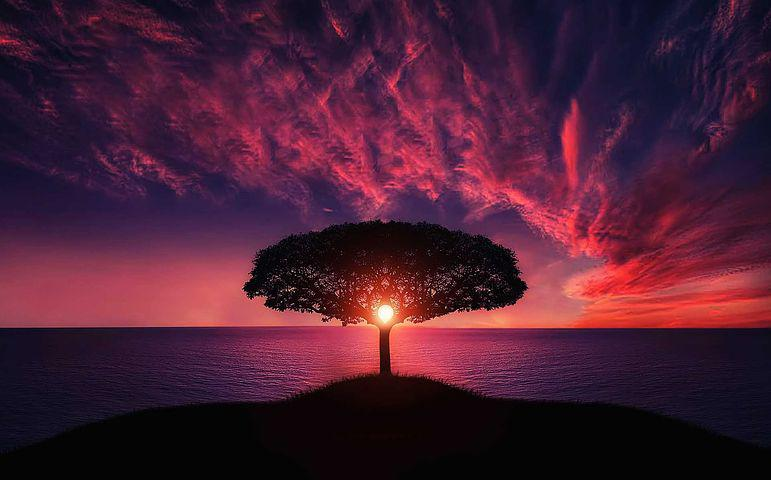

-1

In [14]:
#Load image
image1 = cv2.imread("/content/image1.jpg")
print('Height: {}'.format(image1.shape[0]))
print('Width: {}'.format(image1.shape[1]))
print('Channel: {}'.format(image1.shape[2]))
cv2_imshow(image1)
cv2.waitKey(0)

Our pixels are actually
stored in BGR format, not RGB format.

In [15]:
(b, g, r) = image1[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r,g, b))
image1[0, 0] = (0, 0, 255)
(b, g, r) = image1[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r,g,b))

Pixel at (0, 0) - Red: 10, Green: 10, Blue: 22
Pixel at (0, 0) - Red: 255, Green: 0, Blue: 0


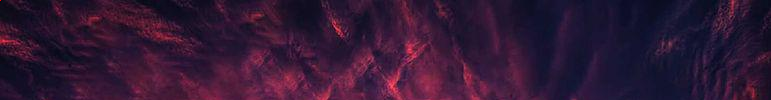

In [16]:
#Show corner
corner = image1 [:100][:200]
cv2_imshow(corner)

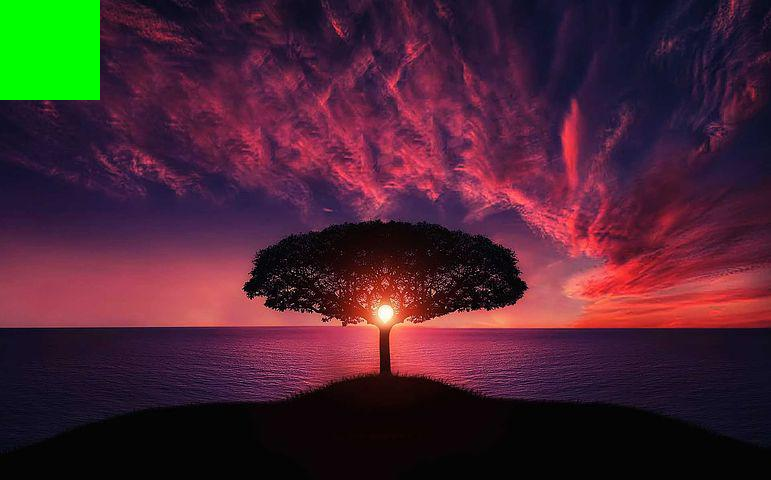

In [17]:
#Change pixel
image1[0:100, 0:100] = (0, 255, 0)
cv2_imshow(image1)

## **2) Drawing**

Luckily, OpenCV provides convenient, easy-to-use methods to draw shapes on an image. In this chapter, we’ll review the three most basic methods to draw shapes: cv2.
line, cv2.rectangle, and cv2.circle

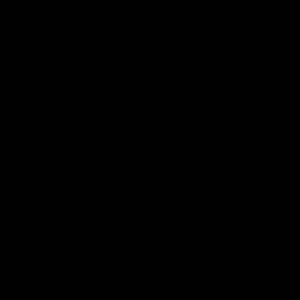

In [28]:
# Drawing
import numpy as np
canva = np.zeros((300,300,3),dtype = "uint8")
cv2_imshow(canva)

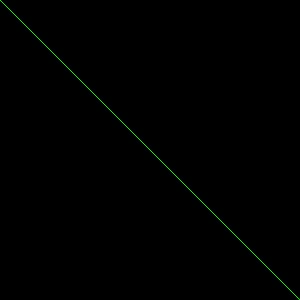

In [29]:
#Draw a line from (0,0) to (300,300)
green = (0,255,0)
cv2.line(canva,(0,0),(300,300),green)
cv2_imshow(canva)

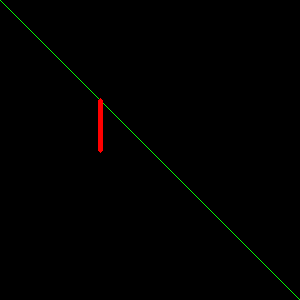

In [30]:
#Draw a triangle
red = (0,0,255)
cv2.line(canva,(100,100),(100,150),red,thickness = 3)
cv2_imshow(canva)

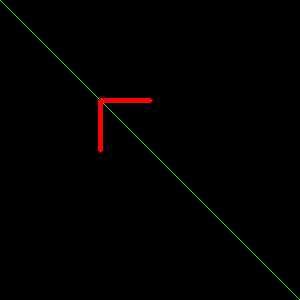

In [31]:
cv2.line(canva,(100,100),(150,100),red,thickness = 3)
cv2_imshow(canva)

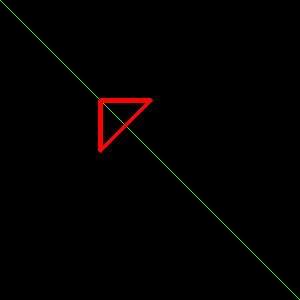

In [33]:
cv2.line(canva,(150,100),(100,150),red,thickness = 3)
cv2_imshow(canva)

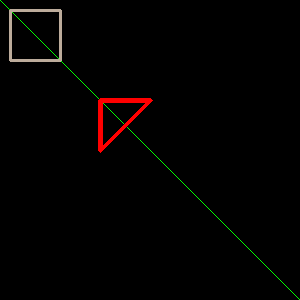

In [34]:
# Draw rectangle with cv2.rectangle method
color = (155,172,188)
cv2.rectangle(canva,(10,10),(60,60),color,thickness=2)
cv2_imshow(canva)

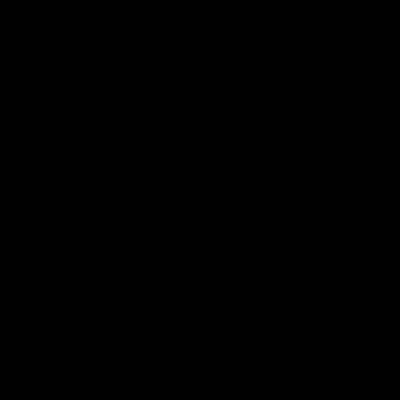

In [41]:
# Draw a simple bulleye
backgr = np.zeros((400,400,3), dtype = "float")
cv2_imshow(backgr)

In [42]:
(centerX, centerY) = backgr.shape[0]//2, backgr.shape[1]//2
          # (b,g,r)
yellow = (0,255,255)
for i in range(0,175,25):
  cv2.circle(backgr,center = (centerX, centerY),radius = i, color = yellow)

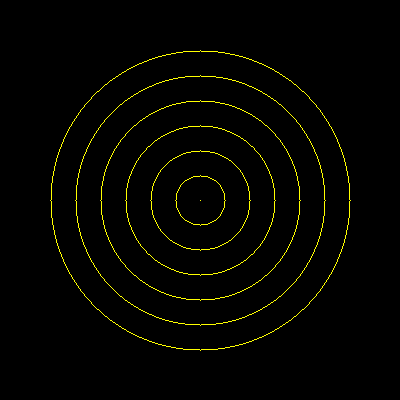

In [43]:
cv2_imshow(backgr)

In [44]:
backgr2 = np.zeros((400,400,3), dtype = "float")

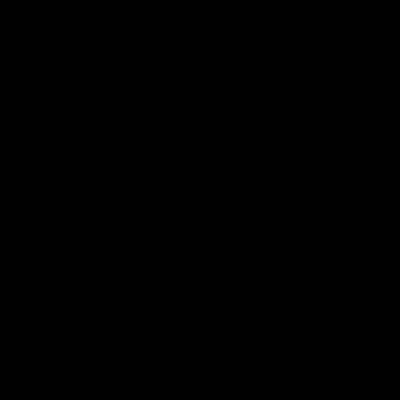

In [46]:
cv2_imshow(backgr2)

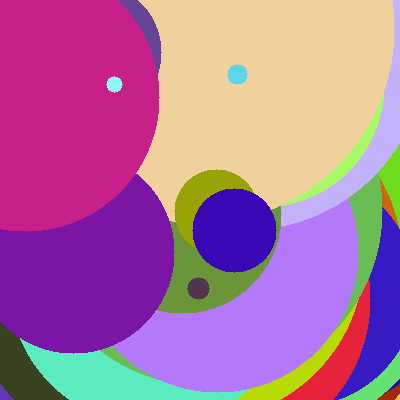

In [63]:
#Draw 25 overlap circle with random radius and color
for i in range(0,25):
  radius = np.random.randint(0,200)
  color = np.random.randint(0,256,size = (3,)).tolist()
  pt = np.random.randint(0,300, size = (2,))
  cv2.circle(backgr2,tuple(pt),radius, tuple(color), thickness = -1)
cv2_imshow(backgr2)

## **3) Image processing**

#### **a) Transformation**

The first method we are going to explore is translation.
Translation is the shifting of an image along the x and y
axis. Using translation, we can shift an image up, down,
left, or right, along with any combination of the above!

We first
define our translation matrix M. This matrix tells us how
many pixels to the left or right, and up or down, the image
will be shifted.
Our translation matrix M is defined as a floating point
array – this is important because OpenCV expects this matrix to be of floating point type. The first row of the matrix
is [1, 0, tx], where tx is the number of pixels we will shift
the image left or right. Negative values of tx will shift the
image to the left and positive values will shift the image to
the right.
Then, we define the second row of the matrix as [0, 1, ty],
where ty is the number of pixels we will shift the image up
or down. Negative value of ty will shift the image up and
positive values will shift the image down.

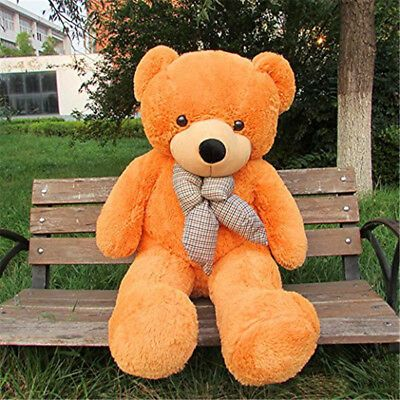

In [64]:
image2 = cv2.imread('/content/image2.jpg')
cv2_imshow(image2)

In [69]:
def translate(image,x,y):
  """
  image: image need to be translate
  x: number of pixels along x-axis to shift
  y: number of pixels along y-axis to shift
  """
  M = np.float32([[1,0,x],[0,1,y]])
  shifted = cv2.warpAffine(image, M, (image.shape[1], image.
  shape[0]))
  return shifted


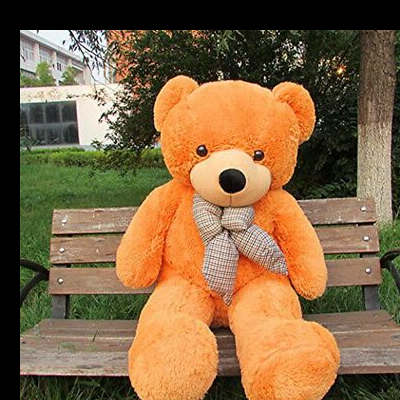

In [71]:
shifted_image2 = translate(image2,20,30)
cv2_imshow(shifted_image2)

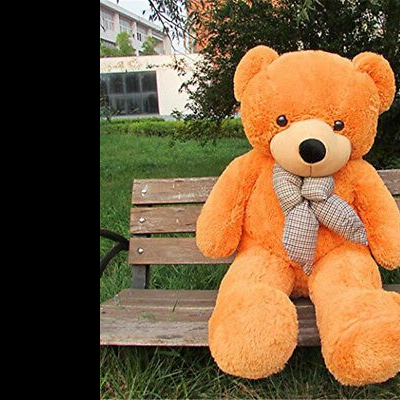

In [72]:
shifted_image2 = translate(image2,100,0)
cv2_imshow(shifted_image2)

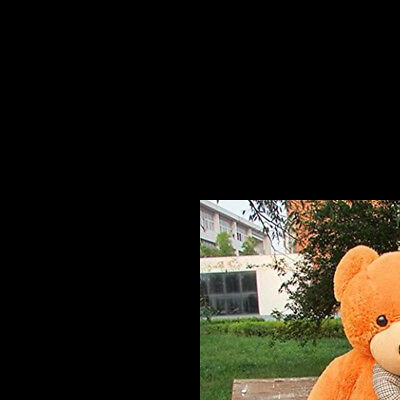

In [74]:
shifted_image2 = translate(image2,200,200)
cv2_imshow(shifted_image2)

### **3) Rotation**

In [81]:
def rotate(image,angle, center = None,scale = 1.0):
  (height, width) = image.shape[:2]
  if center == None:
    center == (height//2, width//2) 
  M = cv2.getRotationMatrix2D((height,width),angle,scale)
  rotated = cv2.warpAffine(image,M,(width,height))
  return rotated

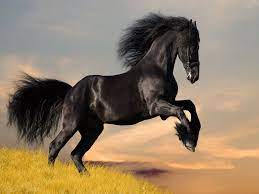

In [78]:
image3 = cv2.imread('/content/horse.jfif')
cv2_imshow(image3)

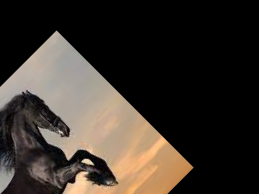

In [84]:
img3_rotate = rotate(image3,45)
cv2_imshow(img3_rotate)

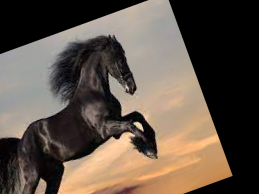

In [86]:
img3_rotate = rotate(image3,20)
cv2_imshow(img3_rotate)

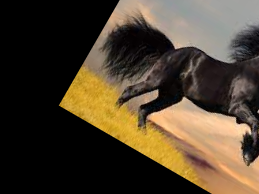

In [88]:
img3_rotate = rotate(image3,-30)
cv2_imshow(img3_rotate)